In [2]:
from math import *

In [4]:
sin(30*pi/180)

0.49999999999999994

In [5]:
import numpy as np

In [7]:
a = np.array([[1, 2 ,3]])

In [8]:
b = np.array([[1, 2, 3], [4, 5, 6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
c = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
c

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [10]:
d = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
d

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [11]:
e = c*d
e

array([[ 9, 16, 21],
       [24, 25, 24],
       [21, 16,  9]])

In [13]:
f = np.dot(c, d)
f

array([[ 30,  24,  18],
       [ 84,  69,  54],
       [138, 114,  90]])

In [14]:
g = np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
g

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [15]:
h = np.matrix([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
h

matrix([[9, 8, 7],
        [6, 5, 4],
        [3, 2, 1]])

In [17]:
i = g*h
i

matrix([[ 30,  24,  18],
        [ 84,  69,  54],
        [138, 114,  90]])

In [20]:
tf = np.matrix([[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9, 10], [10, 11, 12, 13]])
tf

matrix([[ 1,  2,  3,  4],
        [ 4,  5,  6,  7],
        [ 7,  8,  9, 10],
        [10, 11, 12, 13]])

In [21]:
tf[1, 3]

7

In [ ]:
T_i_1_i = np.matrix([[cos(theta_i), -sin(theta_i), 1]])

In [24]:
def rotx(theta):
    R = np.matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])
    return R

In [25]:
x1 = rotx(pi/6)
x1

matrix([[ 1.       ,  0.       ,  0.       ],
        [ 0.       ,  0.8660254, -0.5      ],
        [ 0.       ,  0.5      ,  0.8660254]])

# Forward Kinematics

In [37]:
def tranF(alpha_i_1, a_i_1, d_i, theta_i):
    TF = np.matrix([[cos(theta_i), -sin(theta_i), 0, a_i_1], 
                   [sin(theta_i)*cos(alpha_i_1), cos(theta_i)*cos(alpha_i_1), -sin(alpha_i_1), -sin(theta_i)*d_i],
                   [sin(theta_i)*sin(alpha_i_1), cos(theta_i)*sin(alpha_i_1), cos(alpha_i_1), cos(alpha_i_1)*d_i],
                   [0, 0, 0, 1]])
    return TF

In [38]:
a_i_1 = 2
d_i = 4
theta_i = pi/3
alpha_i_1 = -pi/6

In [39]:
T1 = tranF(0, 0, 0, theta_i)
T2 = tranF(0, a_i_1, 0, alpha_i_1)
T3 = tranF(0, d_i, 0, 0)

In [40]:
T = T1*T2*T3
T

matrix([[ 0.8660254 , -0.5       ,  0.        ,  4.46410162],
        [ 0.5       ,  0.8660254 ,  0.        ,  3.73205081],
        [ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [41]:
x0 = 0
y0 = 0
x1 = a_i_1*cos(theta_i)
y1 = a_i_1*sin(theta_i)
x1, y1

(1.0000000000000002, 1.7320508075688772)

In [43]:
x2 = T[0,3]
y2 = T[1,3]

In [45]:
import matplotlib.pyplot as plt

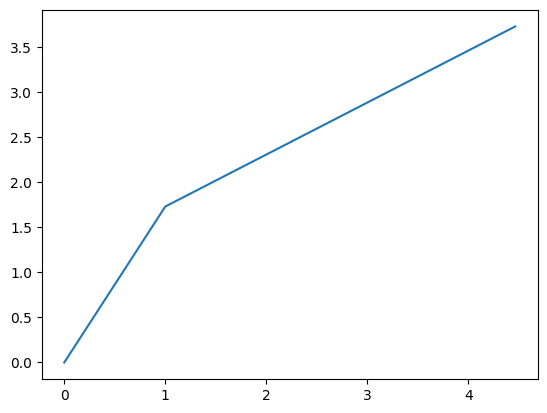

In [46]:
plt.plot([x0,x1,x2], [y0,y1,y2])

In [49]:
x2 = a_i_1*cos(theta_i) + d_i*cos(alpha_i_1 + theta_i)
x2

4.464101615137755

# Inverse Kinematics

In [51]:
c2 = (x2*x2 + y2*y2 - a_i_1*a_i_1 - d_i*d_i)/(2*a_i_1*d_i)
c2

0.8660254037844388

In [59]:
s2_1 = sqrt(1 - c2*c2)
s2_2 = -sqrt(1 - c2*c2)

In [60]:
s2_1

0.49999999999999967

In [61]:
s2_2

-0.49999999999999967

In [66]:
first_a = np.arcsin(s2_1)
(first_a*180)/pi

29.99999999999998

In [67]:
second_a = np.arcsin(s2_2)
(second_a*180)/pi

-29.99999999999998

In [113]:
k1 = a_i_1 + d_i*c2


In [114]:
k1

5.464101615137755

In [115]:
k2 = d_i*s2_2

In [116]:
k2

-1.9999999999999987

In [117]:
theta1 = atan2(y2,x2) - atan2(k2,k1)


In [118]:
theta1  = the2 - the1

In [119]:
(theta1*180)/pi

-19.792181277965813